In [1]:
# Image processing starter kit

## View

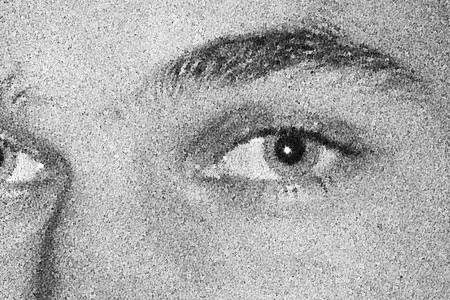

In [1]:
from PIL import Image

img = Image.open('eye.png')
img = img.convert("L") # grayscale
display(img)   # same as display(img)



## Flip

In [97]:
# define function flip()
# open 'eye.png', convert to grayscale, flip, and display
def flip(src):
    img=open(src)
    print("Image before flip")
    display(img)
    width,height=img.size 
    img_dup=img.copy() #created a copy 
    original_data=img.load() #loading the pixel data 
    modified_data=img_dup.load()
    for y in range(height):  # looping over the pixel data
        for x in range(width):
            modified_data[width-1-x,y]=original_data[x,y]  #flipping pixel values horizontally
    
    print("Image after flip")
    return img_dup
    

Image before flip


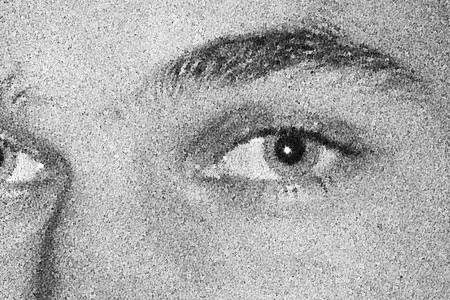

Image after flip


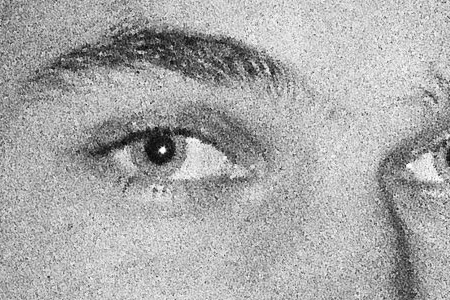

In [100]:
#Calling function
img=flip('eye.png')
display(img)
img.save('output_2.png')

    
    
    

## Blur

In [45]:
# define getpixel, region3x3, avg, and blur functions

def blur(img):
    print("Image before blur")
    display(img) 
    img_dup=img.copy()
    # load the pixel values
    modified_data=img_dup.load()
    width,height=img.size
    for y in range(height):
        for x in range(width):
            region=region3x3(img,x,y)
            modified_data[x,y]=avg(region)
    return img_dup

def avg(region):
    if len(region)!=0:
        return (sum(region)//len(region))
    else: return 0
    
    
def region3x3(img,x,y):
    region=list()
    for i in range(x-1,x+2):
        for j in range(y-1,y+2):
            region.append(getpixel(img,i,j)) 
    return region

def getpixel(img,i,j):
    width,height=img.size
    pixel=img.load()
    if i<0:
        i=0
    elif i>=width:
        i=width-1
    if j<0:
        j=0
    elif j>=height:
        j=height-1
    return pixel[i,j]

Image before blur


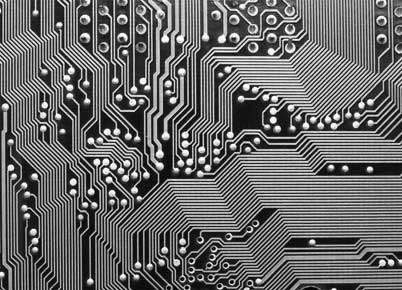

Image after blur


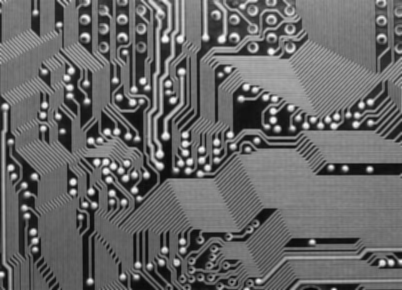

In [101]:
img=open('pcb.png')
img = blur(img)
print ("Image after blur")
display(img)
img.save('output_4.png')

## Denoise

In [47]:
# define median and denoise functions

def median(region):
    length=len(region)
    region.sort()
    return region[length//2]
    
def denoise(img):
    img_dup=img.copy()
    modified=img_dup.load()
    width, height=img_dup.size
    for x in range(width):
        for y in range(height):
            region=region3x3(img,x,y)
            modified[x,y]=median(region)
    return img_dup



    


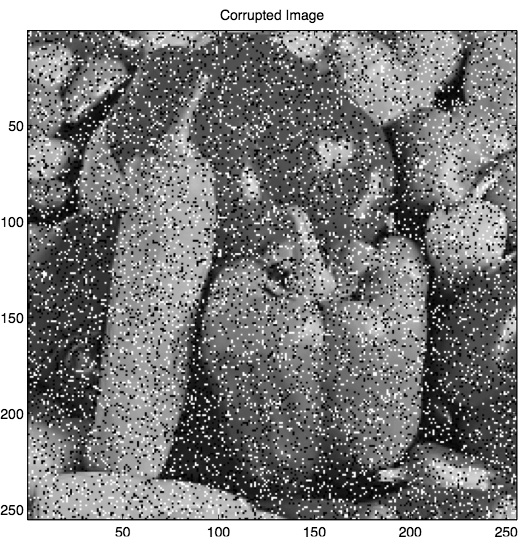

In [102]:
img = open('Veggies_noise.jpg')
display(img)

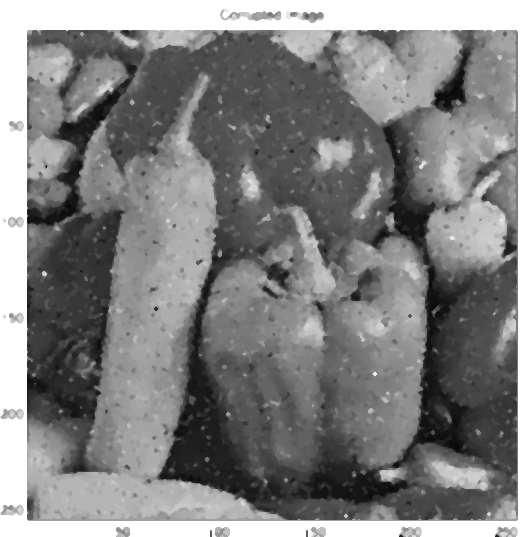

In [104]:
# denoise 3 times and display
for i in range(3):
    img=denoise(img)
display(img)


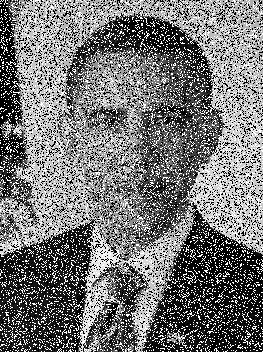

In [50]:
# show 'guesswho.png'
img=Image.open('guesswho.png')
img

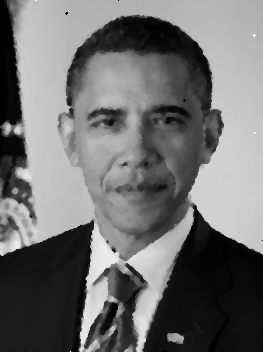

In [51]:
# denoise 3 times then display 
for i in range(4):
    img=denoise(img)
display(img)

## Generic filter

In [52]:
# define filterAnd open functions

def open(fname):
    img=Image.open(fname)
    img=img.convert("L")
    return img

def filter(img,f):
    img_dup=img.copy()
    # load the pixel values
    modified_data=img_dup.load()
    width,height=img.size
    for x in range(width):
        for y in range(height):
            region=region3x3(img,x,y)
            modified_data[x,y]=f(region)
    return img_dup
    


### Blur refactored

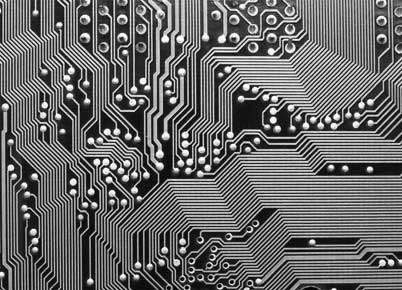

In [53]:
# Display 'pcb.png'
img=open('pcb.png')
img

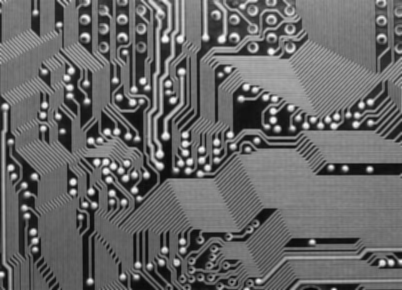

In [54]:
# use filter to blur the image
img=filter(img,avg)
img

### Denoise refactored

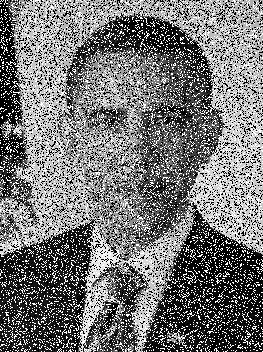

In [55]:
img = open('guesswho.png')
img

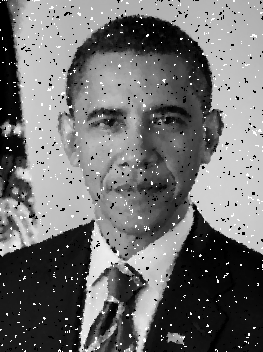

In [56]:
# using filter function, denoise the image
img=filter(img,median)
img

## Edges

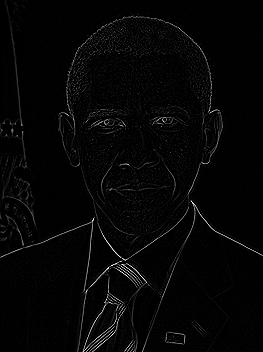

In [59]:
# define laplace function
def laplace(region):
    return (region[1]+region[3]+region[5]+region[7]-4*region[4])
    
    
# Open 'obama.png' and show the edges
img=open('obama.png')
img=filter(img,laplace)
display(img)

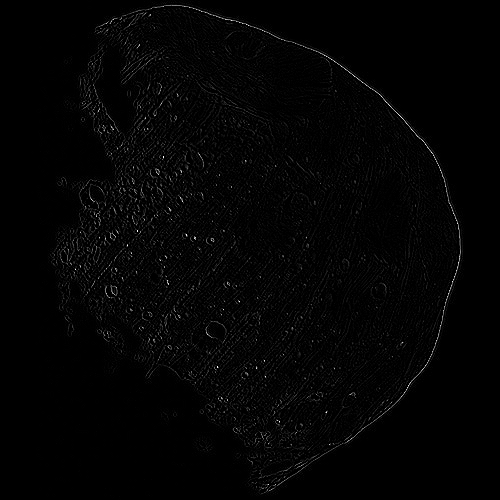

In [64]:
# Show the edges for 'phobos2.jpg
img=open('phobos2.jpg')
img=filter(img,laplace)
img

## Sharpen

In [94]:
# define minus function
def minus(first,second):
    pixel_first=first.load()
    pixel_second=second.load()
    width,height=first.size
    for x in range(width):
        for y in range(height):
            pixel_first[x,y]-=pixel_second[x,y]
    return first
            
    

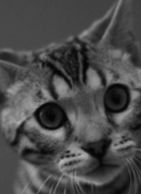

In [95]:
# display 'bonkers.png'
img=open('bonkers.png')
display(img)

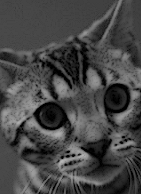

In [96]:
# sharpen that image and display it
edge=filter(img,laplace)
sharp=minus(img,edge)
display(sharp)

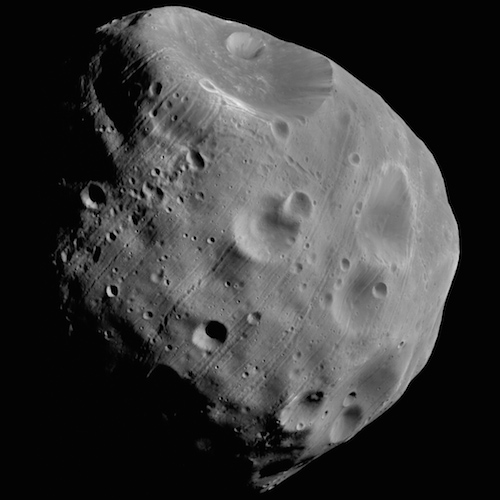

In [92]:
img=open('phobos2.jpg')
img

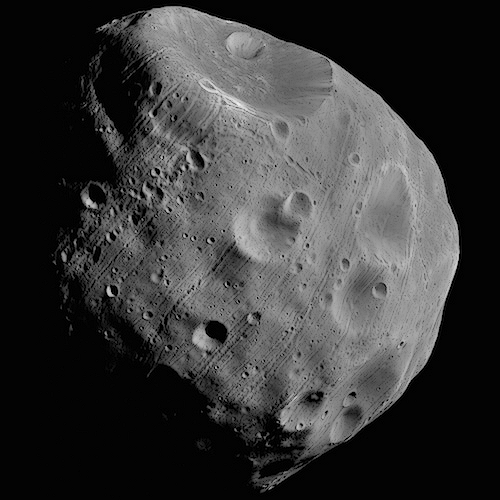

In [93]:
edge=filter(img,laplace)
sharp=minus(img,edge)
sharp